In [1]:

import numpy as np
from data import load_new_data
from keras import models
import time

# In[2]: load model
name='CNN_2024_03_14 22_06_20.h5'
model = models.load_model(name)
print("load ",name)

C:\Users\paula\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\paula\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\paula\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\paula\anaconda3\envs\MNIST\lib\site-packages\tensorflow\python\f

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


Instructions for updating:
Use tf.cast instead.
load  CNN_2024_03_14 22_06_20.h5


In [2]:

# In[3]: one hot decoder
def translate_Y(yi , show = False):
    temp=0    
    for i in range(10):          
          if yi[i] >= temp:
              temp=yi[i]
              yi_new=i
              
    return yi_new


-----------------check_mat------------------
data keys : dict_keys(['__header__', '__version__', '__globals__', 'train_data', 'train_label', 'test_data', 'test_label'])
train_data shape : (55000, 28, 28)
img pixel type : <class 'numpy.float32'>
check_mat train label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


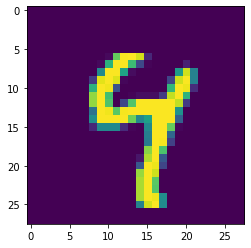

In [3]:
# In[4]: load test data
import matplotlib.pyplot as plt

train_data,train_label,test_data,test_label=load_new_data(True)
train_data=train_data.reshape(train_data.shape[0],28,28,1)
test_data=test_data.reshape(test_data.shape[0],28,28,1)

train_data_len=train_data.shape[0]
test_data_len=test_data.shape[0]

In [4]:
# In[5]: predict
accumulate_time=0
index=0
error=0

for i in range(test_data_len):  # 依序於所有test data中

    print ('\n\n-------------------------------------------')
    print ('---------------- index',index,'----------------')
    #print ('train_data shape :',train_data[i].shape)
    input_data=test_data[i]
    input_data=input_data[np.newaxis, :]
    #print ('input_data shape :',input_data.shape)
    start = time.time()
    prediction=model.predict(input_data) 
    end = time.time()
    accumulate_time += (end - start)
    #print (prediction)
    result=translate_Y(prediction[0])
    golden=translate_Y(test_label[i])

    if result!=golden :
        
        error+=1
        print ('predict fail in',i,'image')
        print ('golden :',golden)
        print ('predict :',result)
        print (prediction[0])
        #break
    
    index+=1



-------------------------------------------
---------------- index 0 ----------------


-------------------------------------------
---------------- index 1 ----------------


-------------------------------------------
---------------- index 2 ----------------


-------------------------------------------
---------------- index 3 ----------------


-------------------------------------------
---------------- index 4 ----------------


-------------------------------------------
---------------- index 5 ----------------


-------------------------------------------
---------------- index 6 ----------------


-------------------------------------------
---------------- index 7 ----------------


-------------------------------------------
---------------- index 8 ----------------
predict fail in 8 image
golden : 5
predict : 6
[2.9328263e-03 4.3899312e-05 1.5183026e-02 1.8038601e-06 3.9339546e-02
 1.0993192e-01 8.2536113e-01 2.7627048e-05 7.0225541e-03 1.5569848e-04]


----------------



-------------------------------------------
---------------- index 165 ----------------


-------------------------------------------
---------------- index 166 ----------------


-------------------------------------------
---------------- index 167 ----------------
predict fail in 167 image
golden : 5
predict : 4
[0.00126766 0.00557311 0.01010295 0.06276363 0.51291764 0.22077227
 0.02274975 0.03427917 0.07162596 0.05794788]


-------------------------------------------
---------------- index 168 ----------------


-------------------------------------------
---------------- index 169 ----------------


-------------------------------------------
---------------- index 170 ----------------


-------------------------------------------
---------------- index 171 ----------------


-------------------------------------------
---------------- index 172 ----------------


-------------------------------------------
---------------- index 173 ----------------


--------------------------



-------------------------------------------
---------------- index 400 ----------------


-------------------------------------------
---------------- index 401 ----------------


-------------------------------------------
---------------- index 402 ----------------


-------------------------------------------
---------------- index 403 ----------------


-------------------------------------------
---------------- index 404 ----------------


-------------------------------------------
---------------- index 405 ----------------


-------------------------------------------
---------------- index 406 ----------------


-------------------------------------------
---------------- index 407 ----------------


-------------------------------------------
---------------- index 408 ----------------


-------------------------------------------
---------------- index 409 ----------------


-------------------------------------------
---------------- index 410 ----------------


--------



-------------------------------------------
---------------- index 625 ----------------


-------------------------------------------
---------------- index 626 ----------------


-------------------------------------------
---------------- index 627 ----------------


-------------------------------------------
---------------- index 628 ----------------
predict fail in 628 image
golden : 3
predict : 9
[1.9071181e-06 4.2192922e-03 3.1355105e-03 1.3136372e-01 6.7811073e-03
 2.6668718e-03 2.8535342e-05 4.9047891e-02 1.7322142e-02 7.8543299e-01]


-------------------------------------------
---------------- index 629 ----------------
predict fail in 629 image
golden : 2
predict : 4
[6.79251738e-03 1.08401095e-04 2.98090190e-01 3.06692702e-04
 4.01453793e-01 1.05061140e-02 2.80766606e-01 2.10262675e-04
 1.54089741e-03 2.24575007e-04]


-------------------------------------------
---------------- index 630 ----------------


-------------------------------------------
---------------- in

predict fail in 829 image
golden : 4
predict : 8
[2.5559700e-04 5.4932851e-04 1.5830830e-02 7.4097922e-04 4.4208387e-01
 1.0068231e-02 1.3101768e-02 5.6099389e-03 4.9282438e-01 1.8935062e-02]


-------------------------------------------
---------------- index 830 ----------------


-------------------------------------------
---------------- index 831 ----------------


-------------------------------------------
---------------- index 832 ----------------


-------------------------------------------
---------------- index 833 ----------------


-------------------------------------------
---------------- index 834 ----------------


-------------------------------------------
---------------- index 835 ----------------


-------------------------------------------
---------------- index 836 ----------------


-------------------------------------------
---------------- index 837 ----------------


-------------------------------------------
---------------- index 838 ---------------



-------------------------------------------
---------------- index 1060 ----------------


-------------------------------------------
---------------- index 1061 ----------------


-------------------------------------------
---------------- index 1062 ----------------
predict fail in 1062 image
golden : 3
predict : 7
[4.4445766e-05 7.0029113e-04 9.0239467e-03 1.2288349e-02 5.7114852e-03
 6.2649359e-04 4.1416435e-05 5.8721429e-01 2.7945619e-03 3.8155466e-01]


-------------------------------------------
---------------- index 1063 ----------------


-------------------------------------------
---------------- index 1064 ----------------


-------------------------------------------
---------------- index 1065 ----------------


-------------------------------------------
---------------- index 1066 ----------------


-------------------------------------------
---------------- index 1067 ----------------


-------------------------------------------
---------------- index 1068 -----



-------------------------------------------
---------------- index 1264 ----------------


-------------------------------------------
---------------- index 1265 ----------------


-------------------------------------------
---------------- index 1266 ----------------


-------------------------------------------
---------------- index 1267 ----------------


-------------------------------------------
---------------- index 1268 ----------------


-------------------------------------------
---------------- index 1269 ----------------


-------------------------------------------
---------------- index 1270 ----------------
predict fail in 1270 image
golden : 4
predict : 9
[2.3547052e-05 4.7393314e-06 5.2932788e-05 3.5454205e-04 3.2437888e-01
 5.6192972e-04 3.8423837e-05 1.3227232e-01 1.2541468e-03 5.4105854e-01]


-------------------------------------------
---------------- index 1271 ----------------


-------------------------------------------
---------------- index 1272 -----



-------------------------------------------
---------------- index 1439 ----------------


-------------------------------------------
---------------- index 1440 ----------------
predict fail in 1440 image
golden : 4
predict : 9
[0.06172064 0.00085753 0.03339582 0.00037241 0.17019792 0.05749346
 0.18972844 0.02795436 0.1583885  0.29989097]


-------------------------------------------
---------------- index 1441 ----------------


-------------------------------------------
---------------- index 1442 ----------------


-------------------------------------------
---------------- index 1443 ----------------


-------------------------------------------
---------------- index 1444 ----------------
predict fail in 1444 image
golden : 6
predict : 7
[1.85397435e-02 1.09029351e-07 5.29220812e-02 5.19188084e-02
 5.43694645e-02 1.04822764e-04 2.17095807e-01 5.69609463e-01
 2.12154002e-03 3.33181545e-02]


-------------------------------------------
---------------- index 1445 -------------



-------------------------------------------
---------------- index 1658 ----------------


-------------------------------------------
---------------- index 1659 ----------------


-------------------------------------------
---------------- index 1660 ----------------


-------------------------------------------
---------------- index 1661 ----------------


-------------------------------------------
---------------- index 1662 ----------------


-------------------------------------------
---------------- index 1663 ----------------


-------------------------------------------
---------------- index 1664 ----------------


-------------------------------------------
---------------- index 1665 ----------------


-------------------------------------------
---------------- index 1666 ----------------


-------------------------------------------
---------------- index 1667 ----------------


-------------------------------------------
---------------- index 1668 ----------------



-------------------------------------------
---------------- index 1894 ----------------


-------------------------------------------
---------------- index 1895 ----------------


-------------------------------------------
---------------- index 1896 ----------------


-------------------------------------------
---------------- index 1897 ----------------


-------------------------------------------
---------------- index 1898 ----------------


-------------------------------------------
---------------- index 1899 ----------------


-------------------------------------------
---------------- index 1900 ----------------
predict fail in 1900 image
golden : 1
predict : 2
[5.9100323e-05 1.5986522e-01 4.1845468e-01 1.5225430e-03 6.7793362e-02
 1.1832492e-05 1.2336069e-02 1.1528283e-02 3.2794687e-01 4.8202294e-04]


-------------------------------------------
---------------- index 1901 ----------------
predict fail in 1901 image
golden : 9
predict : 4
[5.7657209e-05 4.8488152e-04 

predict fail in 2129 image
golden : 9
predict : 8
[1.2555158e-02 9.8135588e-06 2.2321850e-01 1.0987684e-02 2.1716448e-02
 1.0850163e-01 8.5428206e-04 1.8874938e-02 5.6228995e-01 4.0991623e-02]


-------------------------------------------
---------------- index 2130 ----------------
predict fail in 2130 image
golden : 4
predict : 9
[1.7044375e-05 5.4851917e-08 7.3368244e-07 1.8410277e-06 1.1026938e-01
 1.7677591e-04 2.5734078e-05 3.5375049e-03 1.8031048e-02 8.6793989e-01]


-------------------------------------------
---------------- index 2131 ----------------


-------------------------------------------
---------------- index 2132 ----------------


-------------------------------------------
---------------- index 2133 ----------------


-------------------------------------------
---------------- index 2134 ----------------


-------------------------------------------
---------------- index 2135 ----------------
predict fail in 2135 image
golden : 6
predict : 1
[6.34951005e-03 6.



-------------------------------------------
---------------- index 2323 ----------------


-------------------------------------------
---------------- index 2324 ----------------


-------------------------------------------
---------------- index 2325 ----------------
predict fail in 2325 image
golden : 7
predict : 2
[6.5256368e-06 9.8031275e-03 4.9098942e-01 4.4224292e-01 6.7451001e-05
 2.8258935e-04 7.9871085e-04 5.5337489e-02 4.1922138e-04 5.2617026e-05]


-------------------------------------------
---------------- index 2326 ----------------


-------------------------------------------
---------------- index 2327 ----------------


-------------------------------------------
---------------- index 2328 ----------------


-------------------------------------------
---------------- index 2329 ----------------


-------------------------------------------
---------------- index 2330 ----------------


-------------------------------------------
---------------- index 2331 -----



-------------------------------------------
---------------- index 2537 ----------------


-------------------------------------------
---------------- index 2538 ----------------


-------------------------------------------
---------------- index 2539 ----------------


-------------------------------------------
---------------- index 2540 ----------------


-------------------------------------------
---------------- index 2541 ----------------


-------------------------------------------
---------------- index 2542 ----------------


-------------------------------------------
---------------- index 2543 ----------------


-------------------------------------------
---------------- index 2544 ----------------


-------------------------------------------
---------------- index 2545 ----------------


-------------------------------------------
---------------- index 2546 ----------------


-------------------------------------------
---------------- index 2547 ----------------



-------------------------------------------
---------------- index 2746 ----------------


-------------------------------------------
---------------- index 2747 ----------------


-------------------------------------------
---------------- index 2748 ----------------


-------------------------------------------
---------------- index 2749 ----------------


-------------------------------------------
---------------- index 2750 ----------------


-------------------------------------------
---------------- index 2751 ----------------
predict fail in 2751 image
golden : 6
predict : 0
[6.4200079e-01 1.0660309e-05 2.0122183e-03 1.6926697e-03 5.6122572e-05
 3.1022044e-02 3.2025751e-01 7.8964578e-05 2.5774061e-03 2.9173616e-04]


-------------------------------------------
---------------- index 2752 ----------------


-------------------------------------------
---------------- index 2753 ----------------


-------------------------------------------
---------------- index 2754 -----

predict fail in 2957 image
golden : 5
predict : 8
[0.01069836 0.04639895 0.07806686 0.00630342 0.00381589 0.18711193
 0.0637543  0.00147604 0.6012701  0.00110416]


-------------------------------------------
---------------- index 2958 ----------------


-------------------------------------------
---------------- index 2959 ----------------


-------------------------------------------
---------------- index 2960 ----------------


-------------------------------------------
---------------- index 2961 ----------------


-------------------------------------------
---------------- index 2962 ----------------


-------------------------------------------
---------------- index 2963 ----------------


-------------------------------------------
---------------- index 2964 ----------------


-------------------------------------------
---------------- index 2965 ----------------


-------------------------------------------
---------------- index 2966 ----------------


----------------



-------------------------------------------
---------------- index 3172 ----------------


-------------------------------------------
---------------- index 3173 ----------------


-------------------------------------------
---------------- index 3174 ----------------


-------------------------------------------
---------------- index 3175 ----------------


-------------------------------------------
---------------- index 3176 ----------------


-------------------------------------------
---------------- index 3177 ----------------


-------------------------------------------
---------------- index 3178 ----------------


-------------------------------------------
---------------- index 3179 ----------------


-------------------------------------------
---------------- index 3180 ----------------


-------------------------------------------
---------------- index 3181 ----------------


-------------------------------------------
---------------- index 3182 ----------------



-------------------------------------------
---------------- index 3373 ----------------


-------------------------------------------
---------------- index 3374 ----------------


-------------------------------------------
---------------- index 3375 ----------------


-------------------------------------------
---------------- index 3376 ----------------
predict fail in 3376 image
golden : 7
predict : 9
[2.1958264e-04 1.3737868e-03 6.2190629e-05 1.7761574e-03 5.9632761e-03
 1.0054674e-02 2.6935621e-05 2.5808236e-01 3.3208299e-03 7.1912020e-01]


-------------------------------------------
---------------- index 3377 ----------------


-------------------------------------------
---------------- index 3378 ----------------


-------------------------------------------
---------------- index 3379 ----------------


-------------------------------------------
---------------- index 3380 ----------------


-------------------------------------------
---------------- index 3381 -----



-------------------------------------------
---------------- index 3578 ----------------


-------------------------------------------
---------------- index 3579 ----------------


-------------------------------------------
---------------- index 3580 ----------------


-------------------------------------------
---------------- index 3581 ----------------


-------------------------------------------
---------------- index 3582 ----------------


-------------------------------------------
---------------- index 3583 ----------------


-------------------------------------------
---------------- index 3584 ----------------


-------------------------------------------
---------------- index 3585 ----------------


-------------------------------------------
---------------- index 3586 ----------------


-------------------------------------------
---------------- index 3587 ----------------


-------------------------------------------
---------------- index 3588 ----------------

predict fail in 3801 image
golden : 6
predict : 0
[7.3599905e-01 3.0838773e-08 1.6817002e-02 7.7717857e-05 1.4717382e-03
 5.8801025e-03 2.3187526e-01 1.2091968e-03 5.0017057e-04 6.1697033e-03]


-------------------------------------------
---------------- index 3802 ----------------


-------------------------------------------
---------------- index 3803 ----------------


-------------------------------------------
---------------- index 3804 ----------------


-------------------------------------------
---------------- index 3805 ----------------


-------------------------------------------
---------------- index 3806 ----------------
predict fail in 3806 image
golden : 5
predict : 8
[4.0989086e-02 2.7973179e-05 3.5203637e-05 1.9169158e-06 2.6604379e-02
 1.2039632e-01 1.7860003e-01 6.7812442e-03 5.9650004e-01 3.0063795e-02]


-------------------------------------------
---------------- index 3807 ----------------


-------------------------------------------
---------------- index



-------------------------------------------
---------------- index 4052 ----------------


-------------------------------------------
---------------- index 4053 ----------------


-------------------------------------------
---------------- index 4054 ----------------


-------------------------------------------
---------------- index 4055 ----------------


-------------------------------------------
---------------- index 4056 ----------------


-------------------------------------------
---------------- index 4057 ----------------


-------------------------------------------
---------------- index 4058 ----------------


-------------------------------------------
---------------- index 4059 ----------------


-------------------------------------------
---------------- index 4060 ----------------


-------------------------------------------
---------------- index 4061 ----------------


-------------------------------------------
---------------- index 4062 ----------------



-------------------------------------------
---------------- index 4289 ----------------
predict fail in 4289 image
golden : 2
predict : 7
[3.87010686e-02 1.19063034e-05 6.31256611e-04 2.87428466e-05
 1.17724674e-04 8.08773562e-03 1.18083590e-04 9.12589073e-01
 2.89083663e-02 1.08059915e-02]


-------------------------------------------
---------------- index 4290 ----------------


-------------------------------------------
---------------- index 4291 ----------------


-------------------------------------------
---------------- index 4292 ----------------


-------------------------------------------
---------------- index 4293 ----------------


-------------------------------------------
---------------- index 4294 ----------------


-------------------------------------------
---------------- index 4295 ----------------


-------------------------------------------
---------------- index 4296 ----------------


-------------------------------------------
---------------- index



-------------------------------------------
---------------- index 4484 ----------------


-------------------------------------------
---------------- index 4485 ----------------


-------------------------------------------
---------------- index 4486 ----------------


-------------------------------------------
---------------- index 4487 ----------------


-------------------------------------------
---------------- index 4488 ----------------


-------------------------------------------
---------------- index 4489 ----------------


-------------------------------------------
---------------- index 4490 ----------------


-------------------------------------------
---------------- index 4491 ----------------


-------------------------------------------
---------------- index 4492 ----------------


-------------------------------------------
---------------- index 4493 ----------------


-------------------------------------------
---------------- index 4494 ----------------



-------------------------------------------
---------------- index 4687 ----------------


-------------------------------------------
---------------- index 4688 ----------------


-------------------------------------------
---------------- index 4689 ----------------


-------------------------------------------
---------------- index 4690 ----------------


-------------------------------------------
---------------- index 4691 ----------------


-------------------------------------------
---------------- index 4692 ----------------


-------------------------------------------
---------------- index 4693 ----------------


-------------------------------------------
---------------- index 4694 ----------------


-------------------------------------------
---------------- index 4695 ----------------


-------------------------------------------
---------------- index 4696 ----------------


-------------------------------------------
---------------- index 4697 ----------------

predict fail in 4879 image
golden : 8
predict : 6
[1.2052229e-04 2.5683958e-03 2.1638945e-02 1.9015541e-03 1.4755195e-01
 3.8379703e-02 4.4377312e-01 7.5877084e-05 3.2193360e-01 2.2056304e-02]


-------------------------------------------
---------------- index 4880 ----------------
predict fail in 4880 image
golden : 0
predict : 8
[1.3625398e-01 9.4554276e-09 1.5217148e-06 3.4196239e-07 9.7245465e-06
 3.4761384e-02 4.2065368e-03 2.9721360e-08 8.2465750e-01 1.0905074e-04]


-------------------------------------------
---------------- index 4881 ----------------


-------------------------------------------
---------------- index 4882 ----------------


-------------------------------------------
---------------- index 4883 ----------------


-------------------------------------------
---------------- index 4884 ----------------


-------------------------------------------
---------------- index 4885 ----------------


-------------------------------------------
---------------- index

predict fail in 5086 image
golden : 2
predict : 8
[1.3000323e-03 3.9098982e-06 1.5600726e-01 6.0070382e-04 2.3479146e-01
 1.3932833e-03 1.1718364e-03 4.4182464e-04 3.1211087e-01 2.9217872e-01]


-------------------------------------------
---------------- index 5087 ----------------


-------------------------------------------
---------------- index 5088 ----------------


-------------------------------------------
---------------- index 5089 ----------------


-------------------------------------------
---------------- index 5090 ----------------


-------------------------------------------
---------------- index 5091 ----------------


-------------------------------------------
---------------- index 5092 ----------------


-------------------------------------------
---------------- index 5093 ----------------


-------------------------------------------
---------------- index 5094 ----------------


-------------------------------------------
---------------- index 5095 -----



-------------------------------------------
---------------- index 5315 ----------------


-------------------------------------------
---------------- index 5316 ----------------


-------------------------------------------
---------------- index 5317 ----------------


-------------------------------------------
---------------- index 5318 ----------------


-------------------------------------------
---------------- index 5319 ----------------


-------------------------------------------
---------------- index 5320 ----------------


-------------------------------------------
---------------- index 5321 ----------------


-------------------------------------------
---------------- index 5322 ----------------


-------------------------------------------
---------------- index 5323 ----------------


-------------------------------------------
---------------- index 5324 ----------------


-------------------------------------------
---------------- index 5325 ----------------



-------------------------------------------
---------------- index 5546 ----------------


-------------------------------------------
---------------- index 5547 ----------------


-------------------------------------------
---------------- index 5548 ----------------


-------------------------------------------
---------------- index 5549 ----------------


-------------------------------------------
---------------- index 5550 ----------------


-------------------------------------------
---------------- index 5551 ----------------


-------------------------------------------
---------------- index 5552 ----------------


-------------------------------------------
---------------- index 5553 ----------------


-------------------------------------------
---------------- index 5554 ----------------


-------------------------------------------
---------------- index 5555 ----------------


-------------------------------------------
---------------- index 5556 ----------------

---------------- index 5759 ----------------


-------------------------------------------
---------------- index 5760 ----------------


-------------------------------------------
---------------- index 5761 ----------------


-------------------------------------------
---------------- index 5762 ----------------


-------------------------------------------
---------------- index 5763 ----------------


-------------------------------------------
---------------- index 5764 ----------------


-------------------------------------------
---------------- index 5765 ----------------


-------------------------------------------
---------------- index 5766 ----------------


-------------------------------------------
---------------- index 5767 ----------------


-------------------------------------------
---------------- index 5768 ----------------


-------------------------------------------
---------------- index 5769 ----------------


-------------------------------------------



-------------------------------------------
---------------- index 5972 ----------------
predict fail in 5972 image
golden : 5
predict : 3
[5.8162014e-04 6.3078778e-07 6.2606887e-05 4.6774942e-01 9.1005728e-07
 4.5135874e-01 4.9174406e-07 2.3796685e-05 7.8661062e-02 1.5606798e-03]


-------------------------------------------
---------------- index 5973 ----------------
predict fail in 5973 image
golden : 3
predict : 8
[6.2105806e-05 4.8378475e-05 2.8930715e-04 8.1580942e-03 6.1312923e-05
 4.3028291e-02 3.6811671e-04 3.1182601e-05 8.9226973e-01 5.5683464e-02]


-------------------------------------------
---------------- index 5974 ----------------


-------------------------------------------
---------------- index 5975 ----------------


-------------------------------------------
---------------- index 5976 ----------------


-------------------------------------------
---------------- index 5977 ----------------


-------------------------------------------
---------------- index

predict fail in 6168 image
golden : 9
predict : 5
[1.8405912e-02 1.9982072e-05 1.2205274e-02 2.0099640e-02 3.5103979e-03
 5.8151346e-01 3.8649229e-04 8.4475139e-03 2.0604850e-01 1.4936289e-01]


-------------------------------------------
---------------- index 6169 ----------------


-------------------------------------------
---------------- index 6170 ----------------


-------------------------------------------
---------------- index 6171 ----------------


-------------------------------------------
---------------- index 6172 ----------------
predict fail in 6172 image
golden : 9
predict : 5
[4.4146305e-01 3.1457095e-09 9.7639376e-04 1.2789819e-04 4.4266741e-05
 4.9268490e-01 2.5991232e-03 6.4520632e-06 6.1655335e-02 4.4260078e-04]


-------------------------------------------
---------------- index 6173 ----------------
predict fail in 6173 image
golden : 9
predict : 0
[4.5294958e-01 1.2373022e-07 2.8322048e-02 3.0744821e-05 1.2376951e-02
 3.7593925e-01 8.7757567e-03 1.8907082



-------------------------------------------
---------------- index 6381 ----------------


-------------------------------------------
---------------- index 6382 ----------------


-------------------------------------------
---------------- index 6383 ----------------


-------------------------------------------
---------------- index 6384 ----------------


-------------------------------------------
---------------- index 6385 ----------------
predict fail in 6385 image
golden : 5
predict : 2
[5.1061611e-04 2.3406004e-05 7.0824826e-01 2.5909720e-03 3.0956006e-05
 2.2707257e-01 4.8461471e-02 7.7174104e-07 1.3048484e-02 1.2505544e-05]


-------------------------------------------
---------------- index 6386 ----------------


-------------------------------------------
---------------- index 6387 ----------------


-------------------------------------------
---------------- index 6388 ----------------


-------------------------------------------
---------------- index 6389 -----



-------------------------------------------
---------------- index 6575 ----------------


-------------------------------------------
---------------- index 6576 ----------------


-------------------------------------------
---------------- index 6577 ----------------
predict fail in 6577 image
golden : 7
predict : 2
[0.00097763 0.06441708 0.63394076 0.00543625 0.00412167 0.00418846
 0.00392602 0.25843045 0.01647556 0.00808599]


-------------------------------------------
---------------- index 6578 ----------------


-------------------------------------------
---------------- index 6579 ----------------


-------------------------------------------
---------------- index 6580 ----------------


-------------------------------------------
---------------- index 6581 ----------------


-------------------------------------------
---------------- index 6582 ----------------


-------------------------------------------
---------------- index 6583 ----------------


----------------



-------------------------------------------
---------------- index 6768 ----------------


-------------------------------------------
---------------- index 6769 ----------------
predict fail in 6769 image
golden : 4
predict : 8
[1.5083163e-03 6.5794808e-07 1.7701579e-03 1.8143976e-07 2.1573043e-01
 1.9857837e-03 6.4523490e-03 1.8574756e-03 4.9910629e-01 2.7158839e-01]


-------------------------------------------
---------------- index 6770 ----------------


-------------------------------------------
---------------- index 6771 ----------------


-------------------------------------------
---------------- index 6772 ----------------
predict fail in 6772 image
golden : 9
predict : 4
[3.0592666e-03 1.0198185e-08 2.5603285e-05 1.3468348e-06 7.3560226e-01
 5.1537901e-04 7.0578925e-04 4.6493774e-03 2.6829202e-02 2.2861184e-01]


-------------------------------------------
---------------- index 6773 ----------------


-------------------------------------------
---------------- index



-------------------------------------------
---------------- index 6966 ----------------


-------------------------------------------
---------------- index 6967 ----------------


-------------------------------------------
---------------- index 6968 ----------------


-------------------------------------------
---------------- index 6969 ----------------


-------------------------------------------
---------------- index 6970 ----------------


-------------------------------------------
---------------- index 6971 ----------------


-------------------------------------------
---------------- index 6972 ----------------


-------------------------------------------
---------------- index 6973 ----------------


-------------------------------------------
---------------- index 6974 ----------------


-------------------------------------------
---------------- index 6975 ----------------


-------------------------------------------
---------------- index 6976 ----------------



-------------------------------------------
---------------- index 7192 ----------------


-------------------------------------------
---------------- index 7193 ----------------


-------------------------------------------
---------------- index 7194 ----------------


-------------------------------------------
---------------- index 7195 ----------------


-------------------------------------------
---------------- index 7196 ----------------


-------------------------------------------
---------------- index 7197 ----------------


-------------------------------------------
---------------- index 7198 ----------------


-------------------------------------------
---------------- index 7199 ----------------


-------------------------------------------
---------------- index 7200 ----------------


-------------------------------------------
---------------- index 7201 ----------------


-------------------------------------------
---------------- index 7202 ----------------



-------------------------------------------
---------------- index 7411 ----------------


-------------------------------------------
---------------- index 7412 ----------------


-------------------------------------------
---------------- index 7413 ----------------


-------------------------------------------
---------------- index 7414 ----------------


-------------------------------------------
---------------- index 7415 ----------------


-------------------------------------------
---------------- index 7416 ----------------


-------------------------------------------
---------------- index 7417 ----------------


-------------------------------------------
---------------- index 7418 ----------------


-------------------------------------------
---------------- index 7419 ----------------


-------------------------------------------
---------------- index 7420 ----------------


-------------------------------------------
---------------- index 7421 ----------------



-------------------------------------------
---------------- index 7628 ----------------


-------------------------------------------
---------------- index 7629 ----------------


-------------------------------------------
---------------- index 7630 ----------------


-------------------------------------------
---------------- index 7631 ----------------


-------------------------------------------
---------------- index 7632 ----------------


-------------------------------------------
---------------- index 7633 ----------------


-------------------------------------------
---------------- index 7634 ----------------


-------------------------------------------
---------------- index 7635 ----------------


-------------------------------------------
---------------- index 7636 ----------------


-------------------------------------------
---------------- index 7637 ----------------


-------------------------------------------
---------------- index 7638 ----------------



-------------------------------------------
---------------- index 7846 ----------------


-------------------------------------------
---------------- index 7847 ----------------
predict fail in 7847 image
golden : 1
predict : 8
[2.2025831e-04 4.4428106e-02 1.9103812e-01 1.8680524e-03 1.2466225e-03
 2.3247853e-06 1.8823150e-03 8.1411569e-04 7.5783950e-01 6.6058181e-04]


-------------------------------------------
---------------- index 7848 ----------------


-------------------------------------------
---------------- index 7849 ----------------
predict fail in 7849 image
golden : 3
predict : 9
[3.9619023e-05 1.6066560e-04 7.7173218e-02 4.2152949e-02 1.2558854e-01
 1.7550547e-05 1.4658473e-04 5.3075299e-02 2.5397141e-02 6.7624849e-01]


-------------------------------------------
---------------- index 7850 ----------------
predict fail in 7850 image
golden : 5
predict : 8
[3.3424451e-04 1.6635819e-05 5.7459627e-03 5.3863259e-05 1.2691075e-01
 1.2514511e-02 2.4404114e-01 2.4228275



-------------------------------------------
---------------- index 8023 ----------------


-------------------------------------------
---------------- index 8024 ----------------


-------------------------------------------
---------------- index 8025 ----------------


-------------------------------------------
---------------- index 8026 ----------------


-------------------------------------------
---------------- index 8027 ----------------


-------------------------------------------
---------------- index 8028 ----------------


-------------------------------------------
---------------- index 8029 ----------------


-------------------------------------------
---------------- index 8030 ----------------


-------------------------------------------
---------------- index 8031 ----------------


-------------------------------------------
---------------- index 8032 ----------------


-------------------------------------------
---------------- index 8033 ----------------



-------------------------------------------
---------------- index 8234 ----------------


-------------------------------------------
---------------- index 8235 ----------------


-------------------------------------------
---------------- index 8236 ----------------


-------------------------------------------
---------------- index 8237 ----------------


-------------------------------------------
---------------- index 8238 ----------------


-------------------------------------------
---------------- index 8239 ----------------


-------------------------------------------
---------------- index 8240 ----------------


-------------------------------------------
---------------- index 8241 ----------------


-------------------------------------------
---------------- index 8242 ----------------


-------------------------------------------
---------------- index 8243 ----------------


-------------------------------------------
---------------- index 8244 ----------------



-------------------------------------------
---------------- index 8451 ----------------


-------------------------------------------
---------------- index 8452 ----------------


-------------------------------------------
---------------- index 8453 ----------------
predict fail in 8453 image
golden : 5
predict : 8
[2.0728244e-03 4.8679262e-03 1.0817632e-02 2.8928986e-01 5.2442527e-03
 1.6017850e-01 7.5051389e-03 8.9926521e-05 5.0647688e-01 1.3457108e-02]


-------------------------------------------
---------------- index 8454 ----------------


-------------------------------------------
---------------- index 8455 ----------------


-------------------------------------------
---------------- index 8456 ----------------


-------------------------------------------
---------------- index 8457 ----------------


-------------------------------------------
---------------- index 8458 ----------------


-------------------------------------------
---------------- index 8459 -----

predict fail in 8684 image
golden : 3
predict : 8
[1.8668057e-03 1.1843895e-04 1.0836395e-01 7.1604215e-02 2.0701111e-05
 7.0528174e-04 1.9384163e-03 8.9134312e-07 8.1481981e-01 5.6148373e-04]


-------------------------------------------
---------------- index 8685 ----------------


-------------------------------------------
---------------- index 8686 ----------------


-------------------------------------------
---------------- index 8687 ----------------


-------------------------------------------
---------------- index 8688 ----------------


-------------------------------------------
---------------- index 8689 ----------------


-------------------------------------------
---------------- index 8690 ----------------


-------------------------------------------
---------------- index 8691 ----------------


-------------------------------------------
---------------- index 8692 ----------------


-------------------------------------------
---------------- index 8693 -----



-------------------------------------------
---------------- index 8902 ----------------


-------------------------------------------
---------------- index 8903 ----------------


-------------------------------------------
---------------- index 8904 ----------------


-------------------------------------------
---------------- index 8905 ----------------


-------------------------------------------
---------------- index 8906 ----------------
predict fail in 8906 image
golden : 9
predict : 4
[1.9583427e-03 3.6484358e-05 3.2683616e-04 2.9054290e-04 5.3125250e-01
 2.6064418e-02 3.6465572e-03 1.5685098e-02 3.5261296e-02 3.8547781e-01]


-------------------------------------------
---------------- index 8907 ----------------


-------------------------------------------
---------------- index 8908 ----------------


-------------------------------------------
---------------- index 8909 ----------------


-------------------------------------------
---------------- index 8910 -----



-------------------------------------------
---------------- index 9109 ----------------


-------------------------------------------
---------------- index 9110 ----------------


-------------------------------------------
---------------- index 9111 ----------------


-------------------------------------------
---------------- index 9112 ----------------


-------------------------------------------
---------------- index 9113 ----------------


-------------------------------------------
---------------- index 9114 ----------------


-------------------------------------------
---------------- index 9115 ----------------


-------------------------------------------
---------------- index 9116 ----------------


-------------------------------------------
---------------- index 9117 ----------------


-------------------------------------------
---------------- index 9118 ----------------


-------------------------------------------
---------------- index 9119 ----------------



-------------------------------------------
---------------- index 9326 ----------------


-------------------------------------------
---------------- index 9327 ----------------


-------------------------------------------
---------------- index 9328 ----------------


-------------------------------------------
---------------- index 9329 ----------------


-------------------------------------------
---------------- index 9330 ----------------


-------------------------------------------
---------------- index 9331 ----------------


-------------------------------------------
---------------- index 9332 ----------------


-------------------------------------------
---------------- index 9333 ----------------


-------------------------------------------
---------------- index 9334 ----------------


-------------------------------------------
---------------- index 9335 ----------------


-------------------------------------------
---------------- index 9336 ----------------



-------------------------------------------
---------------- index 9556 ----------------
predict fail in 9556 image
golden : 1
predict : 2
[4.8945646e-04 3.4814331e-01 4.4982311e-01 1.3028984e-03 7.7713341e-03
 1.3172800e-05 5.1499166e-02 1.1241878e-02 1.2873635e-01 9.7928697e-04]


-------------------------------------------
---------------- index 9557 ----------------


-------------------------------------------
---------------- index 9558 ----------------


-------------------------------------------
---------------- index 9559 ----------------


-------------------------------------------
---------------- index 9560 ----------------


-------------------------------------------
---------------- index 9561 ----------------


-------------------------------------------
---------------- index 9562 ----------------


-------------------------------------------
---------------- index 9563 ----------------


-------------------------------------------
---------------- index 9564 -----



-------------------------------------------
---------------- index 9806 ----------------


-------------------------------------------
---------------- index 9807 ----------------


-------------------------------------------
---------------- index 9808 ----------------
predict fail in 9808 image
golden : 9
predict : 4
[6.0720636e-06 9.3811268e-06 1.1965003e-05 8.3886908e-04 9.4774139e-01
 1.3839710e-04 9.9918878e-05 1.1344731e-02 7.0858974e-04 3.9100625e-02]


-------------------------------------------
---------------- index 9809 ----------------


-------------------------------------------
---------------- index 9810 ----------------


-------------------------------------------
---------------- index 9811 ----------------
predict fail in 9811 image
golden : 2
predict : 8
[4.5513488e-02 2.1660437e-03 7.7355832e-02 1.0204912e-02 1.5720881e-06
 1.1682584e-02 1.0695588e-04 4.0519931e-03 8.3791554e-01 1.1001106e-02]


-------------------------------------------
---------------- index

In [5]:

# In[6]: result 
num_picture=index
acc= (num_picture-error)/num_picture
print (num_picture,"picture total wrong =",error)
print ("image accuracy = ",acc)

print ('average per execute time: %f ms' %(accumulate_time/test_data_len*1000))

10000 picture total wrong = 733
image accuracy =  0.9267
average per execute time: 0.730144 ms
